In [1]:
import pandas as pd

In [10]:
df = pd.read_csv('Citations.csv', delimiter=r"\s+",names=['Article ID', 'Citation ID'])

In [11]:
df.head()

,Article ID,Citation ID
0,1001,9304045
1,1001,9308122
2,1001,9309097
3,1001,9311042
4,1001,9401139


In [12]:
import networkx as nx

In [13]:
G = nx.DiGraph()

In [14]:
# Collect unique article and citation IDs
nodes = set(df['Article ID']).union(set(df['Citation ID']))




In [16]:
len(nodes)

27770

In [17]:
G.add_nodes_from(nodes)

In [18]:
for row in df.iterrows():
    article_id = row[1]['Article ID']
    citation_id = row[1]['Citation ID']
    
    # Add an edge from the article to its citation
    G.add_edge(article_id, citation_id)

In [19]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 27770
Number of edges: 352807


In [29]:
avg_degree = sum(dict(G.degree()).values()) / num_nodes
print("Average degree:", avg_degree)

Average degree: 25.409218581202737


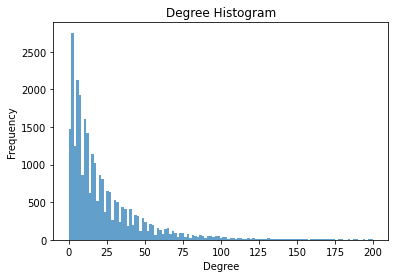

In [30]:
import matplotlib.pyplot as plt

degree_sequence = [degree for node, degree in G.degree()]
plt.hist(degree_sequence, bins='auto', alpha=0.7,range=(0, 200))
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Histogram")
plt.show()

In [36]:
largest_weak_component = max(nx.weakly_connected_components(G), key=len)

largest_weak_subgraph = G.subgraph(largest_weak_component)

print("Size of the largest weakly connected component:", largest_weak_subgraph.number_of_nodes())



Size of the largest weakly connected component: 27400


In [49]:
def page_rank(graph, beta=0.9, max_iterations=100, tolerance=1e-6):
    pagerank = {node: 1.0 for node in graph.nodes}
    for i in range(max_iterations):
        new_pagerank = {}
        delta = 0.0
        for node in graph.nodes:
            rank_sum = sum(pagerank[parent] / graph.out_degree(parent) for parent in graph.predecessors(node))
            new_pagerank[node] = (1 - beta) + beta * rank_sum
            delta += abs(new_pagerank[node] - pagerank[node])
        pagerank = new_pagerank
        if delta < tolerance:
            break
        print(i)
        print(delta)

    return pagerank

In [50]:
pagerank = page_rank(largest_weak_subgraph)

0
24351.773610004566
1
10231.74953843733
2
5430.789720052238
3
3183.502719503025
4
1959.7634571153017
5
1301.9537262844294
6
931.5774785011113
7
667.8410569178719
8
460.6123301964745
9
303.52714241226533
10
191.03831183227524
11
114.9920498696277
12
66.49249564966026
13
37.827046688896445
14
20.928105291573548
15
11.716068188975676
16
6.693843041403799
17
4.092928635629868
18
2.7109176154517147
19
1.9757239791541867
20
1.5521369826636233
21
1.2897891725259378
22
1.1075480219365668
23
0.9703256566850469
24
0.859145252807946
25
0.7656151673551621
26
0.6846264377981834
27
0.6136119196498416
28
0.5506803366140719
29
0.49467169690735463
30
0.444609325257507
31
0.3997857459766377
32
0.3595749993385214
33
0.32347505182569697
34
0.29103592274751255
35
0.26187595406054553
36
0.23565202747532848
37
0.2120644413818607
38
0.19084356038667147
39
0.17175030382560513
40
0.15456953028187104
41
0.13910903484645246
42
0.1251958449414763
43
0.11267484959016441
44
0.10140645378896829
45
0.0912652461291335

In [51]:
sorted_nodes = sorted(pagerank, key=pagerank.get, reverse=True)


In [52]:
for node in sorted_nodes[:10]:
    print(node)

9207016
9201015
9407087
9503124
9510017
9402044
9410167
9711200
9408099
9402002


In [59]:
articles_df = pd.read_csv('ArticleNodes.csv',header=None,names=['Article ID', 'title','year','category','detail'])

In [60]:
articles_df

,Article ID,title,year,category,detail
0,1001,Compactification Geometry and Duality: N=2,2000,NaN,These are notes based on lectures given at T...
1,1002,Domain Walls and Massive Gauged Supergravity P...,2000,Class.Quant.Grav.,We point out that massive gauged supergravit...
2,1003,Comment on Metric Fluctuations in Brane Worlds,2000,NaN,Recently- Ivanov and Volovich (hep-th/991224...
3,1004,Moving Mirrors and Thermodynamic Paradoxes,2000,Phys.Rev.,Quantum fields responding to moving mirrors...
4,1005,Bundles of chiral blocks and boundary conditio...,2000,NaN,Various aspects of spaces of chiral blocks a...
...,...,...,...,...,...
29550,9912290,Shuffling quantum field theory,1999,Lett.Math.Phys.,We discuss shuffle identities between Feynma...
29551,9912291,Small object limit of Casimir effect and the s...,1999,Phys.Rev.,We show a simple way of deriving the Casimir...
29552,9912292,1/4 PBGS and Superparticle Actions,1999,NaN,We construct the worldline superfield massiv...
29553,9912293,Corrections to the Abelian Born-Infeld Action ...,1999,JHEP,In a recent paper Seiberg and Witten have ar...


In [61]:
for node in sorted_nodes[:10]:
    article_title = articles_df.loc[articles_df['Article ID'] == node, 'title'].values[0]
    article_year = articles_df.loc[articles_df['Article ID'] == node, 'year'].values[0]
    article_category = articles_df.loc[articles_df['Article ID'] == node, 'category'].values[0]
    
    print("Title:", article_title, "PageRank:", pagerank[node],'year',article_year,'cat',article_category)
    

Title: Noncompact Symmetries in String Theory PageRank: 111.4072492949247
Title: An Algorithm to Generate Classical Solutions for String Effective Action PageRank: 104.46215010591648
Title: Monopole Condensation  And Confinement In N=2 Supersymmetric Yang-Mills PageRank: 69.2441980417631
Title: String Theory Dynamics In Various Dimensions PageRank: 51.77356445912381
Title: Dirichlet-Branes and Ramond-Ramond Charges PageRank: 47.95476019289145
Title: Exact Results on the Space of Vacua of Four Dimensional SUSY Gauge PageRank: 45.493041246610844
Title: Unity of Superstring Dualities PageRank: 38.579724413635695
Title: The Large N Limit of Superconformal Field Theories and Supergravity PageRank: 35.41753806871167
Title: Monopoles  Duality and Chiral Symmetry Breaking in N=2 Supersymmetric PageRank: 34.73138332060727
Title: Strong-Weak Coupling Duality in Four Dimensional String Theory PageRank: 34.48003869639041
